# Final_Projects_Su2020
**IS590PR** Summer 2020 
**Author**: David Mendoza
**GitHub ID**: djmendoza
**Fork URL**: https://github.com/djmendoza/Final_Projects_Su2020

---

## Type III Project Introduction

Since 2015, The Washington Post ("The Post") has been building a database of fatal police shootings in the United States,
along with pertinent information relating to each incident (e.g., race of participants , gender, body-cams,
if the deceased was suffering a mental-health crisis, etc.).
According to The Post, their dataset is nearly twice the size as the official FBI dataset on the same subject, due in part to varied reporting
practices among policing agencies, as well as other factors, and notes, "5480 people have been shot and killed by police since Jan. 1, 2015" (Tate et al., 2015).

The Post recently released this dataset has recently become available for public use, and the kernel I will be reviewing and enhancing was the top-rated kernel based
on the data in the first weeks of the database's release. A legacy copy, as well as my annotated review copy, is included in this GitHub Repo.  
Mrinaal007's kernel uses Numpy and Pandas, as well as visualization/plotting modules (e.g., matplotlib, seaborn).

### The Type III review will cover 3 areas relating to the project:

1. Project Code Review: A detailed review of user Mrinaal007's kernal notebook based on John Weible's *Program Quality and Code Reviews* (Weible, 2020) featuring some analysis.
2. Kaggel Project Analysis Review: An detailed analysis of one of the sections of the project, featuring an enhancement.
3. Fatal Force Database Analysis: A brief analysis of racial categories in the Washington Post's *Fatal Force* database. 


---

### *Note: The cells below are the work of the original developer Mrinal (mrinaal007 (alias), 2020), and are functionally untouched from the developer's (now defunct) Kaggel notebook, save for line sections denoted by double ##'s and comments, such as in Section 2.* 

---

# <a id='one'>1. Importing Libaries </a> 

In [36]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# <a id='two'>2. Loading the data & basic pre-EDA</a>
 

In [37]:
##df = pd.read_csv('/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv')
df = pd.read_csv('fatal-police-shootings-data.csv') ## changed file location  to my own github for ease of use

In [38]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 14 columns):
id                         5480 non-null int64
name                       5480 non-null object
date                       5480 non-null object
manner_of_death            5480 non-null object
armed                      5268 non-null object
age                        5243 non-null float64
gender                     5479 non-null object
race                       4934 non-null object
city                       5480 non-null object
state                      5480 non-null object
signs_of_mental_illness    5480 non-null bool
threat_level               5480 non-null object
flee                       5224 non-null object
body_camera                5480 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 524.5+ KB


In [40]:
df.shape

(5480, 14)

# <a id='three'>3. Datetime Feature Engineering</a>

In [41]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

# <a id='four'>4. Missing Values</a>

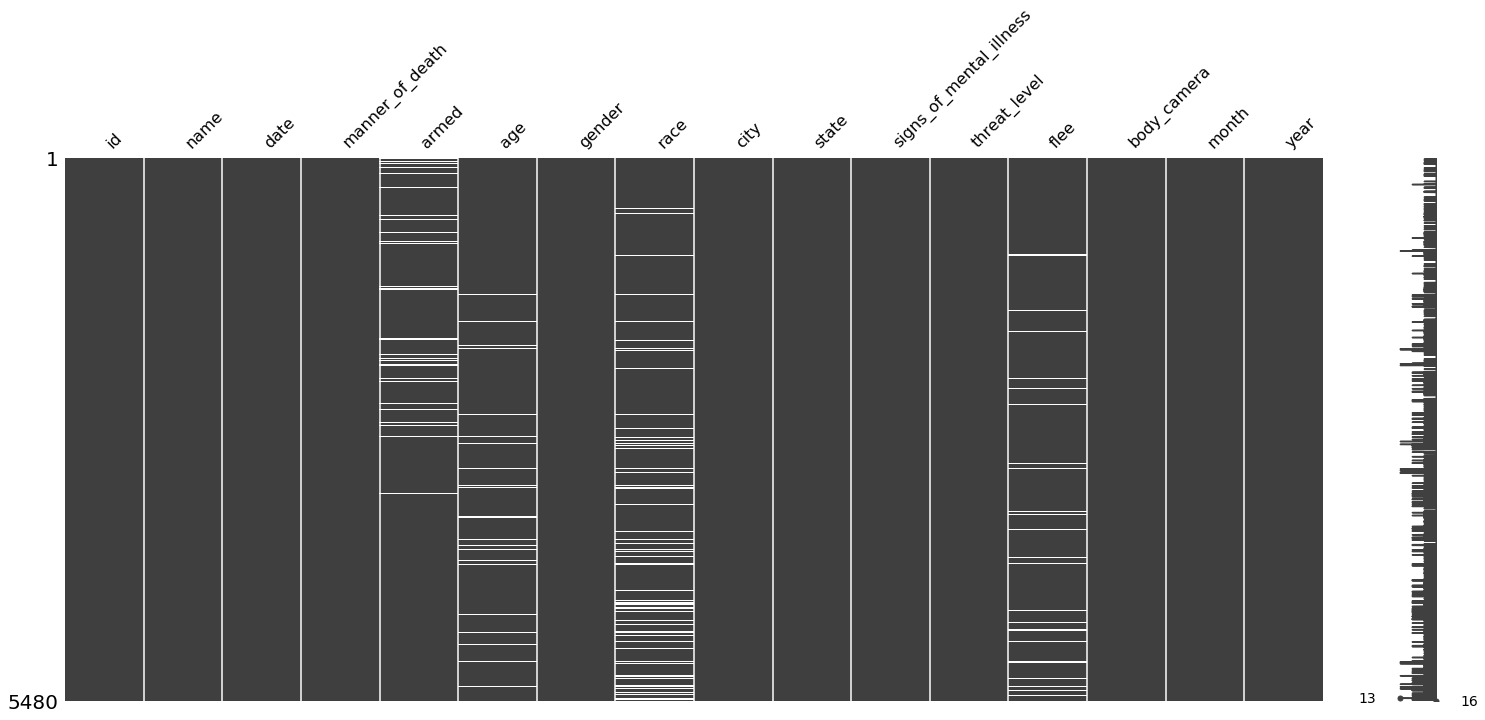

In [42]:
msno.matrix(df)

## Percentage of missing values
>### Since missing values are less than 5% for almost all the data. Therefore, By dropping missing records we aren't loosing lot of information.

In [43]:
missing_percentage=df.isna().sum()*100/df.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      3.868613
age                        4.324818
gender                     0.018248
race                       9.963504
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.671533
body_camera                0.000000
month                      0.000000
year                       0.000000
dtype: float64

In [44]:
df.dropna(inplace=True)

## Checking cardinality of the features!

In [45]:
cardinality ={}
for col in df.columns:
    cardinality[col] = df[col].nunique()

In [46]:
cardinality

{'id': 4449,
 'name': 4430,
 'date': 1752,
 'manner_of_death': 2,
 'armed': 90,
 'age': 75,
 'gender': 2,
 'race': 6,
 'city': 2137,
 'state': 51,
 'signs_of_mental_illness': 2,
 'threat_level': 3,
 'flee': 4,
 'body_camera': 2,
 'month': 12,
 'year': 6}

In [47]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

# <a id='five'>5. Distribution of shootouts by the police 👮</a>
>### From the distribution,It seems like that White american were shot by the police most often during police engagement.
>### In the data, acronymns used and their meanings:

>A - Asian,
W - White,
H - Hispanic,
B - Black,
O - Others,
N - Native


In [48]:
killing_by_race=df[df['manner_of_death']=='shot']
fig = px.histogram(killing_by_race,x='race',color='race')
fig.show()

# <a id='six'>6. Distribution of unarmed people killed due to police shootout across different race</a>

> ### It is evident from the graph that among unarmed people white people were killed the most followed by the black people 

In [49]:
unarmed_shootout = df[df['armed']=='unarmed']['race']
fig = px.histogram(unarmed_shootout,x='race',color='race')
fig.show()

# <a id='seven'>7. Top 10 states in the US infamous for police shootings</a>


In [50]:
shootout_by_states = df['state'].value_counts()[:10]
shootout_by_states = pd.DataFrame(shootout_by_states)
shootout_by_states=shootout_by_states.reset_index()
fig = px.pie(shootout_by_states, values='state', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# <a id='eight'>8. Agewise distribution of the people who were shot</a>


> ### From the graph, most of the people who were shot were between late twenties and early thirties

In [51]:
import plotly.figure_factory as ff
np.random.seed(1)
x = df['age']
hist_data = [x]
group_labels = ['Age']
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

# <a id='nine'>9. Usage of Body Camera</a>

> ### Majority of the time police was not using body camera!

In [52]:
df['body_camera'].value_counts()

False    3901
True      548
Name: body_camera, dtype: int64

> ### Racewise summary of the shootouts when police wasn't using body camera

In [53]:
camera_false = df[df['body_camera']==False]
camera_false['race'].value_counts()

W    2054
B     983
H     697
A      69
N      59
O      39
Name: race, dtype: int64

> ### Racewise summary of the shootouts when police was using body camera

In [54]:
camera_true = df[df['body_camera']==True]
camera_true['race'].value_counts()

W    226
B    192
H    100
A     14
N     12
O      4
Name: race, dtype: int64

# <a id='ten'>10. Daywise distribution of shootings</a>

In [55]:
daily_shootouts = df[['date']]
daily_shootouts['kills'] = 1
daily_shootouts=daily_shootouts.groupby('date').sum()
daily_shootouts = daily_shootouts.reset_index()

fig = px.line(daily_shootouts, x='date', y='kills')
fig.show()

# <a id='eleven'>11. Innocent people shot by police</a>
> ### People who were shot by the police who didn't have any signs of mental illness nor they were armed or fleeing from the police.

In [56]:
innocent_people = df[(df.signs_of_mental_illness==False) & (df.armed =='unarmed') & (df.flee=='Not fleeing')]
innocent_people = innocent_people['race'].value_counts()
innocent_people = pd.DataFrame(innocent_people)
innocent_people=  innocent_people.reset_index()
fig = px.pie(innocent_people, values='race', names='index', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# <a id='twelve'>12. Yearwise shooting by Police</a>
> ### Around 825 people are shot by US Police on an average throughout the year.

In [57]:
yearly_shootouts = df['year'].value_counts()
yearly_shootouts = pd.DataFrame(yearly_shootouts)
yearly_shootouts= yearly_shootouts.reset_index()
yearly_shootouts=yearly_shootouts.rename(columns={'index':'year','year':'Shootouts'})
fig = px.bar(yearly_shootouts, y='Shootouts', x='year', barmode='group')
fig.show()

# <a id='thirteen'>13. Yearwise shooting by Police - Racewise</a>

In [58]:
kills_per_year = df[['year','race']]
kills_per_year ['kills'] =1
kills_per_year  = kills_per_year .groupby(['year','race']).sum()
kills_per_year = kills_per_year .reset_index()
fig = px.bar(kills_per_year , y='kills', x='year',color='race', barmode='group')
fig.show()

# <a id='fourteen'>14. Monthwise shooting by Police - Racewise</a>

In [59]:
kills_monthly = df[['month','race']]
kills_monthly['kills'] =1
kills_monthly  = kills_monthly.groupby(['month','race']).sum()
kills_monthly =  kills_monthly.reset_index()
fig = px.bar(kills_monthly, y='kills', x='month',color='race', barmode='group')
fig.show()

# <a id='fifteen'>15. Mental illness and Shooting across different race</a>

In [60]:
mental_illness = df[df.signs_of_mental_illness==True]
mental_illness = mental_illness[['year','race']]
mental_illness['kills'] =1
mental_illness  = mental_illness.groupby(['year','race']).sum()
mental_illness= mental_illness.reset_index()
fig = px.bar(mental_illness, y='kills', x='year',color='race', barmode='group')
fig.show()

# <a id='sixteen'>16. City with most police killing (Yearwise) </a>

In [61]:
yearly_shooting_record_citywise = df[['city','year']]
yearly_shooting_record_citywise['kills'] = 1
yearly_shooting_record_citywise = yearly_shooting_record_citywise.groupby(['year','city']).sum()
yearly_shooting_record_citywise= yearly_shooting_record_citywise.reset_index()
yearly_shooting_record_citywise=yearly_shooting_record_citywise.sort_values(by=['year','kills'],ascending=False)
yearly_shooting_record_citywise

,year,city,kills
3054,2020,Houston,6
3059,2020,Jacksonville,5
3140,2020,Phoenix,5
2950,2020,Atlanta,4
2991,2020,Columbus,4
3064,2020,Kansas City,4
3077,2020,Las Vegas,4
3166,2020,San Antonio,4
2980,2020,Chicago,3
3086,2020,Long Beach,3


In [62]:
city_shooting= pd.DataFrame(columns=['year','city','kills'])
for year in range(2015,2021):
    temp= yearly_shooting_record_citywise[yearly_shooting_record_citywise.year==year].iloc[0:1,:]
    city_shooting=city_shooting.append(temp,ignore_index=True)

fig = px.bar(city_shooting, y='kills', x='year',color='city', barmode='group')
fig.show()

# <a id='seventeen'>17. Statewise killing across different years with/without Body Camera</a>

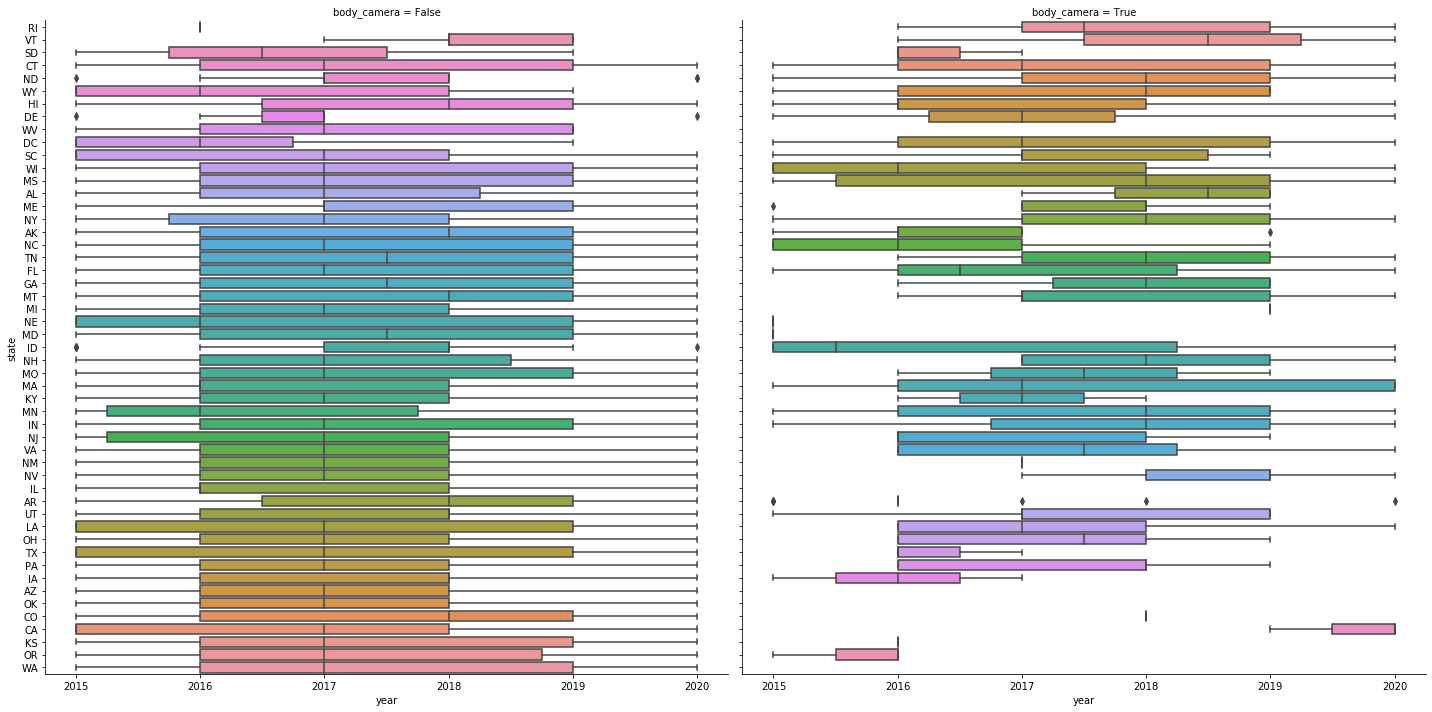

In [63]:
sns.catplot(x = 'year',y='state', kind = 'box', data = df,height = 10, col = 'body_camera')

 # <a id='eighteen'>18. Conclusion</a>
 >### From the whole analysis, It is consistent that whites are more likely to get shot by the police followed by the blacks. 
 
 >## Thank you so much! Please **upvote** if you found the analysis interesting, It keeps me motivated for delivering quality content! 
 <img src='https://media.giphy.com/media/9Ai5dIk8xvBm0/giphy.gif' height=500 width=500>

# <a href='#Top'><button>Go to Top</button></a> 


------

### *Note: The preceding cells are the work of the original developer Mrinal, and are functionally untouched from the developer's (now defunct) Kaggel notebook, save for line sections denoted by double ##'s and comments, such as section 2. All cells below are the original comments and work of UIUC student davidjm8 (a.k.a. djmendoza) for IS 590PR SU2020, except where noted.*

------

## IS590 PR Final Project Written Analysis

### Project Background

User Mrinal's Kaggle kernel entitled *👮🔫 Police Shootouts 👮🔫* explores the Washington Post's *"Fatal Force"* police shooting database, and it features some competent use of Pandas and Numpy; it is both well laid-out and easy to follow, making navigation of its notebook simple and intuitive though the use of a convenient table-of-contents. Likewise, as presented, most of the sections that are covered appear to feature succinct code that pulls data straight from the dataframe, being therefore both straight-forward and matter-of-fact, used principally to select desired portions of the dataframe and then present said sections via various plotting methods. The chosen plotting methods appear to be succinct and easily understandable without the need for extensive explanation (perhaps with the exception of *4. Missing Values*).

*A note on section titles: Mrinal has decided to liberally use emojis throughout the text their project; for readability, outside of the reference to the title above or direct quotes, I will dispense with including these emojis when referring to sections titles throughout the course of my analysis.*  

---

### Database Components

The *Washington Post's* *Fatal Force* database is a collection of fatal United States police shooting data from 2015 until the present. It is in csv format, and features the following headings:

* **id**
* **name**  - The suspect/victim's name
* **date** (yyyy-mm-dd format)
* **manner_of_death** -  *Shot, Tasered*, or "*shot and Tasered*"
* **armed** - *unarmed, gun, toy gun, knife, NaN*, as well as others (e.g. *shovel*) 
* **age** (float64)
* **race** - the suspect/victim's race (in a questionable format to be addressed later)
* **gender** - *male, female, None* (i.e., unknown)
* **city**
* **state**
* **signs_of_mental_illness** (bool)
* **threat_level** - *attack, undetermined, other*:
 Roughly, if the suspect/victim was attacking the officer and/or violent at the time of the shooting
* **fleeing** - *Not fleeing, Car, Foot, NaN*:
 Was the victim/suspect fleeing at the time of the shooting
* **body_camera** - Was there police body camera footage of the data available

### Race variables

According to the Post's GitHub (2015), the racial categories are:

* W: White, non-Hispanic
* B: Black, non-Hispanic
* A: Asian
* N: Native American
* H: Hispanic
* O: Other
* None: unknown

The implications of this choice of racial breakdowns will be discussed later in an analysis of the *Fatal Force* database itself.

----

## Project Code Review

The 👮🔫 Police Shootouts  👮🔫 kernel notebook is well-organized and succinct, even though it covers a number of varied aspect of data exploration (e.g., age, race,  body-camera usage, distribution of unarmed suspects/victims, etc). Likewise, the notebook uses interesting and varied plotting methods to readily articulate the data, including histograms and pie-charts, among others, and maintains a logical progression of the data analysis. However, there are some rather questionable issues in the language and assumptions used in the code that denote a bias in the user's approach (especially in regards to what constitutes an "innocent" suspect/victim vis-a-vis one who is not "innocent").
Similarly, confusing choices for variables and section titles paired with a lack of in-line comments, introduces ambiguity to one's ability to engage with the content on offer, as will be discussed further.

This Kaggle kernel principally serves as a quickly-assembled exploration into the *Fatal Force* database, and, as such, does not feature many conventions of coding style that one would assume from a more fully-developed or complete project (e.g., Doctests, adequate or frequent coding comments, modularity through use of functions, etc.). For example, despite a clear interface, the code does not feature any end-user instructions for loading the database or porting the kernel to other platforms, nor does it feature exception handling or error feedback to the user; likewise, this kernel presumes its users have familiarity with Pandas and Numpy, and mostly ignores providing detailed explanations of most of the data points being extracted. However, as the kernel is both straight-forward and aimed at an audience of other Kaggle users for use on Kaggle's website, it is not particularly necessary for the program to feature detailed end-user instructions, as it serves its purpose on Kaggle adequately (however, I would be remiss to ignore that I did need to adjust the `pd.read_csv()` file location in order to operate own copy included here). Similarly, modularity is not a feature of this Kaggle kernel, as the kernel features no functions and is hard-coded for direct manipulation of the data straight from the dataframe. Again, whether this is necessarily to the detriment of the kernel is debatable, as, like noted earlier, the kernel is aimed at being a quick overview and its current format is both utilitarian and aimed at providing quick plotting for ready digestion of said data. 


#### **Program Behavior, Usability, Design** (Weible, 2020, p.1)

There is only one dataset in use by the notebook, `fatal-police-shootings-data.csv`, which appears to be loaded from the original Kaggle page hosted for this data set owned by user [Andriy Samoshin](https://www.kaggle.com/mrmorj/data-police-shootings/notebooks?sortBy=hotness&group=everyone&pageSize=20&datasetId=723010). However, it may be loaded from the user Mrinal's own Kaggle repo; regardless, while the legitimacy of the dataset is taken on good-faith to be unaltered and not 'tainted' from its original Washington Post GitHub, technically, this may be an area where "untrusted external input" (p.1) could be introduced to the notebook, and appears outside the author's direct control as written. However, as accessing this public data is basically the point of the kernel/shared dataset/Kaggle, that is not really a major point against the it (as previously noted, for ease of use, I did change my version's `read_csv()` path to point to a local copy).

What is somewhat ethically ambiguous that the code features no citations or supporting materials for the code used; it is possible that the author did create the code on offer extemporaneously (as it is not particularly complex for someone of a skillset greater than my ken), but Mrinal's does not reference any code for any of the modules used. I do know that their notebook was one of the earliest published for this newly released dataset, however, so Mrinal is one of the first Kaggle users to work with the `fatal-police-shootings-data.csv`, and likely is using their own work. However, as the documentation fails to provide any citations to other work, this can only be presumed as opposed to explicitly demonstraited.   

#### **Modularity & Reusability** (2020, p.2)

**Is the code written in an overly-specific way that prevents it from being re-usable?**

Yes, though whether this is inappropriate is debatable? As the code is designed to manipulate, extract, and plot data from one specific database (i.e., *Fatal Force*), it is insular and specific to the that single database. This may be acceptable, however, as the program does have clear division between the categories of the notebook sections, and each are easily marked and readily understood; each section has only a few snippets of code chunks, allowing one to understand the code of each category independently, meaning the code is more utilitarian than "fully-formed", but this is not really to the detriment of the program's usability as much as it is a limitation of modularity in applying the code as-written to other datasets: *limited modularity is a given here as it is working with a single dataframe for one dataset*.

For example, in section *5. Distribution of shootouts by the police*, with `px` meaning the `plotly.express` module, Mrinal's code reads:

    killing_by_race=df[df['manner_of_death']=='shot']
    fig = px.histogram(killing_by_race,x='race',color='race')
    fig.show()

Naturally, as this code is a query designed to pull and plot specific data from a singular dataset, it is not particularly flexible in what ways it may be utilized, but as three lines of code, it certainly accomplishes its task succinctly.

Still, the code lacks functions, classes, and other typical aspects associated with more robust coding conventions; it is, at its core, a collection of short code-chucks strung together by a single dataframe and theme. Were it to incorporate an additional outside dataset, there would undoubtedly need to be some revisions to the code in order to accommodate.

#### Efficiency (p.2)

**Is the code written efficiently and does the code perform efficiently** (2020, p.2)?

I  believe so, yes, with a few exceptions. The code is certainly succinct. It is minimal, but it extracts the desired data and then plots said data as desired. Likewise, the code is minimal enough that there is no perceived slow-down in running the code. The original notebook is hosted on Kaggle, but running the code on a local system only results in a limited initial hang-up of resources (likely just a result of the Juptyer notebook initializing), but any additional reimplementation of the code results in near-instantaneous results (not  surprising given the minimal lines used per category). There has been a few issues with the code that I will address in the next section that does relate to running the code with Jupyter Notebooks.

The one area that could be considered inefficient in that, while the developer does check for `dtypes` on import of the dataframe, they do not specify any particular typing for the data, leaving it up to Python. Most of the data are set as objects, but could likely be changed into strings. 

**Professional-Quality & Production-Quality Considerations** (2020, p.2)

The kernel does not feature any bug or issue-tracking systems, nor does feature any VCS commits that I was able to to find (though Kaggle does link to both GitHub and/or Google's Developer API, so they may be hidden elsewhere).

I have encountered a continued issue with the graph in *10. Daywise distribution of shootings* failing to render in Pycharm, but it does not have an issue rendering within Jupyter Notebooks, so this may be specific to my PC or PyCharm, respectively. As for running on Juptyer Notebooks, I have experienced a few troubles with most of the plotted cells not rendering the first time the program is run, but a "Restart & Clear Output" action seems to clear the issue up and post as expected. Regardless, this code kernel is not designed to be robust, but does feature multi-OS capabilities, as it is a Jupyter Notebook kernel.

Interestingly, at *4. Missing Values*, the developer used a check, output, and plot the missing values in the dataset.
Then developer uses `df.dropna()` to scrub out the NA values. I am curious if this best practice when dealing with these types of missing data; in section 4, the developer claims, "Since missing values are less than 5% for almost all the data.\[*sic*\] Therefore, By \[*sic*\] dropping missing records we aren't loosing \[*sic*\] lot of information". 5% seems like a lot of missing data to just ignore to me as is, but the racical data seems to be at almost 10%.   

#### **Maintainability & Readability** (Weible, 2020, p.1)

If there is an area that the the short program encounters real issues, it is in its readability, and some of the issues discussed here will lead into the analysis of the later critique of the implications of the Mrinal's data analysis.

*First, an aside:*  To be candid, I found the user's choice to begin and end the notebook with animated gifs (*South Park* and *Mr. Bean*, respectively) to be in poor taste. I am not overly familiar with Kaggle's atmosphere, but it does appear to be casual and light-hearted across the site, which is good and inviting in itself. However, the subject matter of database in question is a collection of **the sudden and violent deaths of human persons** (as well as possible subsequent psychological trauma on the part of the officers involved), so perhaps gravitas would be more appropriate in dealing with it here.

Regardless, as previously noted, as far as I can tell, there is no stable VSC or commit record available for this program available, so I am unable to comment on that (they may have even created it in one session). That said, the code style does appear to be consitent througout the notebook, and does appear to be styled correctly for its purpose and genre (i.e., Pandas queries). My familiarity with plotting functions is limited, but a cursory look into the documentation on matplot and plotly seems to indicate acceptable usage here (not suprising, again, given the program's utilitarian scripting)(Bar Charts | Python | Plotly, 2020; Hunter et al., 2020; NetworkX Developers, 2019).    

However, the developer's choices for section titles and variables are often confusing and questionably accurate. For example, *6. Distribution of unarmed people killed due to police shootout across different race* features the following: 

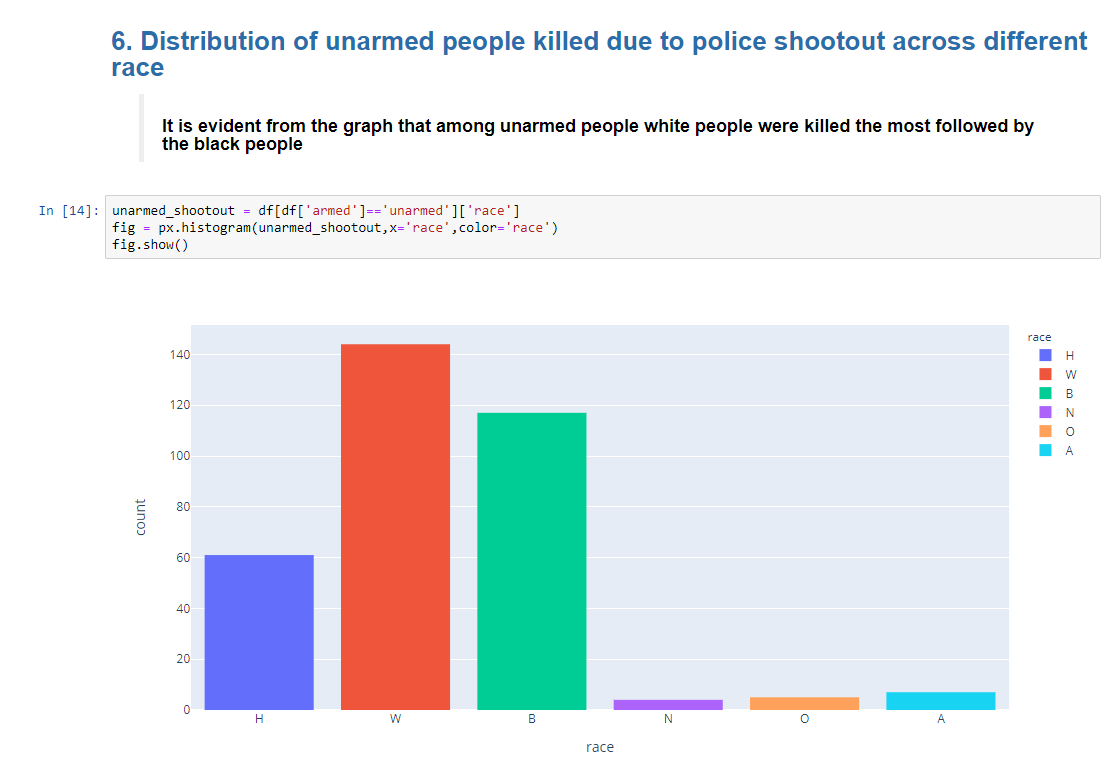

In [64]:
# Adapted from (Mathieu, 2017), https://gitlab.com/gitlab-org/gitlab-foss/-/issues/33995, due to GitHub Markdown limitations
from IPython.display import display, Image
display(Image(filename='screenshots/6.Distribution.PNG'))

The developer chose to use the variable `unarmed_shootout`, which is confusing for a few reasons:

* It is not really properly descriptive in a coding sense (i.e., it is not descriptive of the data that it contains). `unarmed_shootout` does indeed feature the data of shootings where the deceased was unarmed, but its query is also *sorted by race*, so wouldn't describing that be useful to note?
`unarmed_shootout_by_race` or `unarmed_shootout_race` might be more clear.
 For reference, `unarmed_shootout.tail()` looks like so:


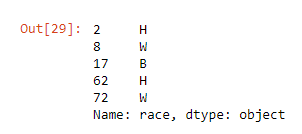

In [65]:
display(Image(filename='screenshots/6.Tail.PNG'))

* It is not really properly descriptive in a logical sense (i.e., it is not descriptive of what the data is *telling us*).
A shootout in which one of the participants is unarmed is not a "shootout", it is a "shooting". A "shootout" implies that at least two participants are exchanging fire with each other. 

This second point is one of the more curious aspects of the whole notebook/kernel. The developer uses the term "shootout" throughout the whole of the project (even in the title), but such a term is not really reflective of the overall dataset, which only features ~2600 instances where a "shootout" could occur (not that a shootout actually *did* occur, just that there was a potential for one to, as the deceased was in possession of a firearm at the time of the incident): 

*Note: The following code is adapted from* (Guan, 2020).

In [66]:
# Code adaped from ybull, https://github.com/iSchool-590pr/Summer2020_examples/blob/master/week_08_pandas/pandas_intro.ipynb 
# These queries ignore the variables 'knive', 'toy gun', and all others. 
unarmed_shooting = df[df['armed']=='unarmed'].shape[0]
armed_shooting_gun = df[df['armed']=='gun'].shape[0]
print('The # of unarmed shootings was', unarmed_shooting, 'versus the # of armed shootings (gun), at',armed_shooting_gun, ".") 

The # of unarmed shootings was 338 versus the # of armed shootings (gun), at 2619 .


The program also features other language issues that cause confusion, but I suspect that is is a product of the developer not being a native English speaker, which, of course, is no fault of their own, but it does highlight the issue of others being able to understand your code or what you are trying to convey with your data analysis. Again, this is just a Kaggle Exploritory Analysis notebook, not a school assignment or professional program, but it would certainly require grammatical editing to conform to American Business English standards if it was. Ultimately, however, the code *itself* is easily understood and does not require much revision; it is surrounding commentary and variable names that would need to be addressed. Such issues would not likely be too problematic, but they begin to bleed into the developer's analysis of the data as well, which hurts the credibility of their findings, as will be discussed next.

---

## Kaggel Project Analysis Review

**Unfortunate Implications of Language**

*I assert that, when producing something that may be consumed by others, it is an ethical responsiblity to be cautious and sensitive to both the subject matter at hand, as well as one's audience. I believe this certainly extends to development, both in the code created and the results produced.* Unfortunately, some of the choices and results of this Kaggel kernel made me very uncomfortable. 


The kernal's analysis has been influenced by the earlier inacurrate use of language. The most glaring of these analytical oversites (in my opinion) regards the discussion in *11. Innocent people shot by police*:

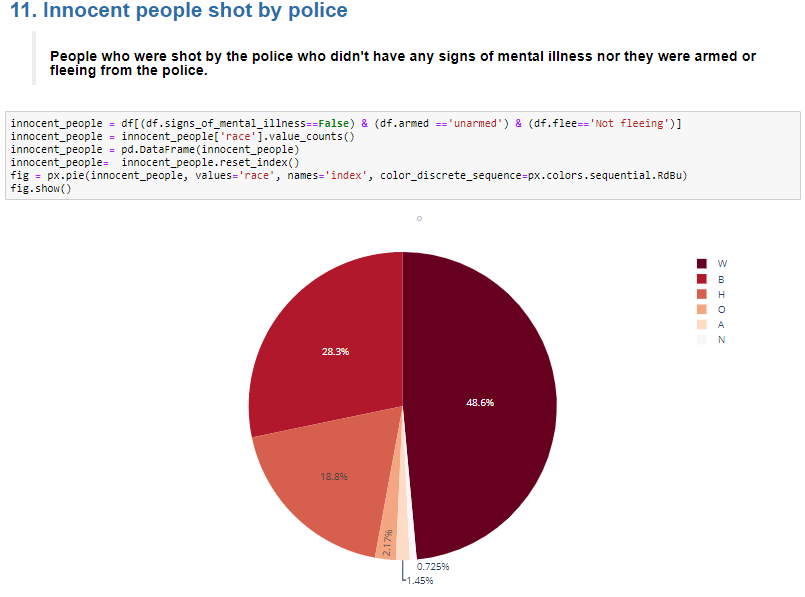

In [67]:
display(Image(filename='screenshots/11.Full.PNG'))

From an analysis point of view, for example, "11. Innocent people shot by police" indicates a flaw in an understanding of the topic as a whole
(or, at least an ambiguity that could be taken as either biased or insensitive), as the delineation between "innocent"
and whatever its opposite is circumspect:
"People who were shot by the police who didn't have any signs of mental illness nor they were armed or fleeing from the police".

Because of a commonly known aspect of United States criminal law, as none of the deceased individuals were convicted as guilty in a court of law over the incidents for which they were shot, they are, under the United States Pesumption of Innocence tenent (along with due process requirements), *presumptively* not guilty based on the fact that the desceased have not been found as guilty under due process requirements mandated in the Fifth and Fourteenth Amendments of the United States Constitution (The Constitution of the United States and The Declaration of Independence, 2016). Naturally, just because one is **unable to be found guilty** does not necessitate that one is **innocent**. Ignoring the likely relevant point that the developer may not be overly familiar with United States criminal law, the choice of the queries still strikes me as bizarre:

    innocent_people = df[(df.signs_of_mental_illness==False) & (df.armed =='unarmed') & (df.flee=='Not fleeing')]

It may be more accurate to denote these were cases where there was no 'justifiable use of force',
but, due to the developer's particular query choses, that would still indicate that lethal use of force is justifiable against the mentally-distressed or those those who were fleeing from police, which is a position that I assume many would find untenable and/or outright offensive. One could even argue that a mental-health crisis a may negate someone's guilt in an altercation, as one's agency may be nullified by said mental-distress, therefore negating one's complicity therein. 
The query also infers "armed" == "illegal possession", which is presumptive for those living in a nation known for its legally enshrined right-to-bear arms (2016, p.25). Similarly, `(df.armed =='unarmed')` ignores cases where the object held by the desceased may be inoccuous (e.g., toy gun, shovel, etc.), but might cause an (arguable) over-reaction on the part of the officer. 

I do not think this these blind-spots were part of the developer's intention, but I state that primarily out of a courtesy to assume the positive intent of the other. Taken by itself, the query language certainly indicates an intentionality behind these choices, and therefore a clear oversite or possible bias. Regardless, it is ambiguous enough to be an issue, especially given how developer's possible bias is built into the code itself via the query language used. For my own part, I have chosen to use the term *deceased* to describe the individuals in the database, as it is both neutral and accurate, **though I am unsure if it is the best or most sensitive option, either**.  


**Correcting This Issue** (IN PROGRESS)


As the data has a variable that accounts for the threat level, including it in a query relating to some type of presumed justified use of force on the part of the officer may be a prundent step. According to the Post's GitHub (2020): 

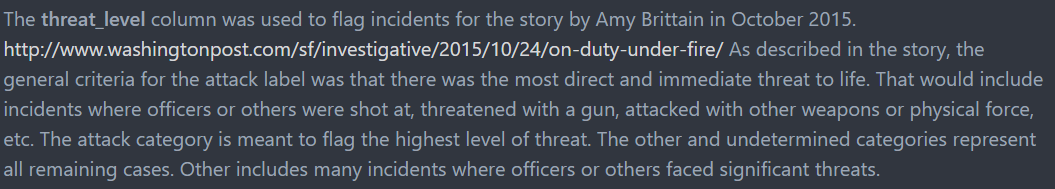

In [68]:
display(Image(filename='screenshots/Post.threat_a.PNG')) # Adapted from (Mathieu, 2017)

#### Highlighting the Aspects Done Well

(IN PROGRESS)




---

## *Fatal Force* Database Analysis

The *Fatal Force* dataset is both extensive and detailed, and it is clearly a collection that its varied team has diligently and extensively curated. That it exists and that the public has been provided access to it for personal and proffesional analysis is a social good, and I am particular impressed by its inclusion of data relating to police body-worn cameras (BWC). 
Taken as a whole, it must be noted how, given the varied reporting practices from various departments and the tragically high number of police shootings that have occured in only a 5-year reporting period (5480), the dataset that The Post has compiled here is quite commendable. However, I believe there are issues with how they categorize race variables.    


**Limitations of the *Fatal Force* Dataset**

It is not a controversial statement to say the concept of race, is in itself, a highly nuanced issue; likewise, as the recent murder of George Floyd and the subsequent worldwide events that have followed that tragic event have readily shown, it is not a controversial statement to say that that the interplay between race and policing practices is highly nuanced and often contentious; the race's of the participants of any policing interation, both uniformed and citizen, likely play a role in that interaction's outcome, and it is regrettable that the *Fatal Force* database fails to provide a category about the race of the officer involved in the shootings it logs in order to help investigations further into that issue. Still, the dataset does provide a significant amount of information that promotes investigations into race, but I consider the categories to be inadequate in this regard, as the variables as written may leave too much open-ended racial data to be entirely reliable.

That the included metadata is bare-bones does not help its reliability.


As noted previously, the Post's (2020) *Fatal Force* database features the following categories:

* W: White, non-Hispanic
* B: Black, non-Hispanic
* A: Asian
* N: Native American
* H: Hispanic
* O: Other
* None: unknown

While one understands there are sacrfices and limitations that must be made when deciding how to compile data, these racial categories are not ideal. 
For one, the racial categories here are both overly-broad and too narrow (or at least ambigious):

What, perhaps constitues the *Other* variable? Neither the database's metadata nor the related Post article answers this question.
- Do these categories include mixed-race, bi-racial, or multi-racial individuals?
- Do Pacific Islanders fall under this category, as well? Or do they fall under the broad and vague category *Asian*?
- Are all those of Middle-Eastern descent also considered *Other*s? 
- Do those of Brazilian background also classify as *Other* here (as Brazil is a Portuguese-speaking nation, this background does not typically classify as "Hispanic")? 

Similarly, as Mrinal's *4. Missing Values* check found earlier, nearly 10 percent of the *race* data was missing.

*Note: The following code is adapted from* (Guan, 2020) *and* (mrinaal007 (alias), 2020).

In [69]:
# Adapted from https://github.com/iSchool-590pr/Summer2020_examples/blob/master/week_08_pandas/pandas_intro.ipynb  
other_count = df[df['race']=='O'].shape[0]
df_copy = pd.read_csv('fatal-police-shootings-data.csv') # Create a second df still containing NAs to check their count
none_count = df_copy['race'].isna().sum() # adapted from (mrinaal007 (alias), 2020).
print("The dataset contains", other_count, "\"Other\" entries, and", none_count, "\"None\" entries (i.e., ", other_count + none_count,") out of 5480 total entries.")

The dataset contains 43 "Other" entries, and 546 "None" entries (i.e.,  589 ) out of 5480 total entries.


Admittedly, 43 "Other" entries is minimal, but when it is paired with another 546 missing entries the total is a not insignificant amount of data. 
Mrinal focused on analyzing 4 sections grouped by race data, and race-centric shooting analysis was also a primary feature of the Post article associated with this dataset (Tate et al., 2020). There is a strong intrest in race-based analysis right now, but (as corroborated by Mrinal's value check) ~10%, of the data is unclear to that discussion. I consider that a sizable enough a portion of missing data to render the findings suspect. 

Likewise, there is another ambiguity issue with using these racial categories: strictly speaking, "Hispanic" is not a *race*, but an *ethnic identity*, and has officially been excluded from the 2020 United States Census as a potential racial category choice *(citation needed or common knowledge? )*. This race/ethnic group designation is itself contentious amoung those who make up its membership, however, with a majority of Hispanics considering it to be a racial background, according to a 2015 article from the Pew Research Center (Gonzalez-Barrera & Lopez):
our diversity and discounts the racism and pigmentocracy that plague Hispanic societies. To ask Afro-Hispanics to choose between being black and being Hispanic is to negate their unique identity. To ask white Hispanics to distance themselves from their European heritage is to diminish the important ways Spain helped shape the United States... Hispanics can look like anyone. Such differences require more nuance than we get when we consolidate Hispanics into one race (para 3). 

Whether Sierra's view is the definitive or correct view is on this subject is debatable, but it is certainly informed and highlights a potenial bias that has been built into the dataset distributed by the same outfit that published his article. That the current structure of the data could improperly bias the reporting is obvious, but as the murder of George Floyd has revealed the harm race-based policing policing practices have caused black Americans, it does cause one to question how the data analysis would change if coded categories did not create such a strict delineation between Hispanic and non-Hispanic, especially in regards to Afro-Hispanics (who have been frequently overlooked in most discussions around Hispanics). Though this is only a hypothesis, given the wide-spread race-related police violence faced by its community, I suspect that the recorded number of fatal shooting of black Americans would increase and likely reflect a more accurate picture than can be gleaned from the database in its current form.        



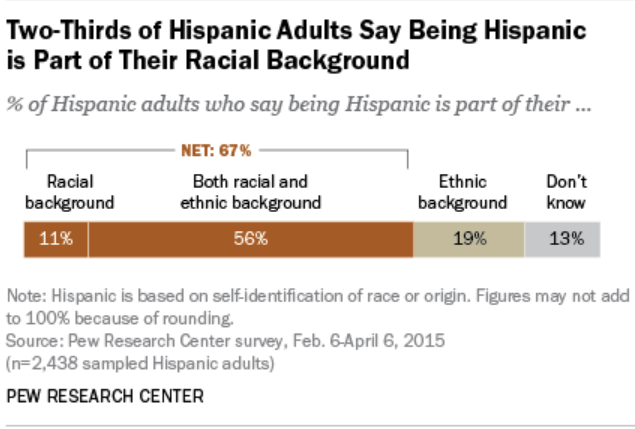

In [70]:
display(Image(filename='screenshots/Pew.race.PNG')) # 

In practical reality, whether members of the Hispanic community consider said background to also be their racial identity varies by individual (I, for one, consider myself bi-racial, including Hispanic), but using this particular data format both codefies troubling implications for those using the database along with also placing the Post's reporting at odds with itself. Writing for an 2019 Washington Post article entitled *Five myths about Hispanics*, Bowie State University professor of Language, Literature, and Cultural Studies Horacio Sierra noted the following:

>Hispanics constitute an ethnic community, not a race — a distinction evident on forms that ask if you’re non-Hispanic white or non-Hispanic black...Seeing Hispanics as a racial group erases our diversity and discounts the racism and pigmentocracy that plague Hispanic societies. To ask Afro-Hispanics to choose between being black and being Hispanic is to negate their unique identity. To ask white Hispanics to distance themselves from their European heritage is to diminish the important ways Spain helped shape the United States... Hispanics can look like anyone. Such differences require more nuance than we get when we consolidate Hispanics into one race (para 3). 

Whether Sierra's view is the definitive or correct view is on this subject is debatable, but it is certainly informed and highlights a potenial bias that has been built into the dataset distributed by the same outfit that puublished his article. That the current structure of the data could improperly bias the reporting is obvious, but as the murder of George Floyd has revealed the harm race-based policing policing practices have caused black Americans, it does cause one to question how the data analysis would change if coded categories did not create such a strict delineation between Hispanic and non-Hispanic, especially in regards to Afro-Hispanics (who have been frequently overlooked in most discussions around Hispanics). Though this is only a hypothesis, given the wide-spread race-related police violence faced by its community, I suspect that the recorded number of fatal shooting of black Americans would increase and likely reflect a more accurate picture than can be gleaned from the database in its current form.

---

### References

- Bar Charts | Python | Plotly. (2020). Plotly. https://plotly.com/python/bar-charts/

- Gonzalez-Barrera, A., & Lopez, M. H. (2015, June 15). Is being Hispanic a matter of race, ethnicity or both? | Pew Research Center. Pew Research Center. https://www.pewresearch.org/fact-tank/2015/06/15/is-being-hispanic-a-matter-of-race-ethnicity-or-both/

- Guan, Y. (2020, July 7). Summer2020_examples/pandas_intro.ipynb at master · iSchool-590pr/Summer2020_examples. GitHub. https://github.com/iSchool-590pr/Summer2020_examples/blob/master/week_08_pandas/pandas_intro.ipynb

- Hunter, J., Dale, D., Droettboom, M., & Matplot Development Team. (2020, July 17). Pyplot tutorial — Matplotlib 3.3.0 documentation. https://matplotlib.org/tutorials/introductory/pyplot.html

- Jenkins, J., Rich, S., Tate, J., Muyskens, J., Fox, J., Fallis, D., & Rindler, D. (2020, July 8). Police shootings database 2015-2020 - Washington Post. Washington Post. https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

- Mathieu, O. (2017). Image in markdown do not display in jupyter notebooks (#33995) · Issues · GitLab.org / GitLab FOSS · GitLab. GitLab.Org. https://gitlab.com/gitlab-org/gitlab-foss/-/issues/33995

- NetworkX Developers. (2019, October 17). Tutorial — NetworkX 2.4 documentation. NetworkX. https://networkx.github.io/documentation/stable/tutorial.html#edges

- Sierra, H. (2019, October 3). Five myths about Hispanics - The Washington Post. Washington Post. https://www.washingtonpost.com/

- Tate, J., Jenkins, J., Rich, S., Muyskens, J., Kennedy Elliott, & Mellnik, T. (2015). GitHub - washingtonpost/data-police-shootings: The Washington Post is compiling a database of every fatal shooting in the United States by a police officer in the line of duty in 2015 and 2016. The Washington Post. https://github.com/washingtonpost/data-police-shootings

- The Constitution of the United States and The Declaration of Independence (2016th ed.). (2016). Racehorse Publishing.

- Weible, J. (2020). Program Quality and Code Reviews. https://learn.illinois.edu/pluginfile.php/6279486/mod_resource/content/2/Program Quality and Code Reviews.pdf




      



